# 1.- Load libraries

In [4]:
from influxdb import DataFrameClient
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates 
import requests 
from datetime import datetime, timedelta
import time
import ast
import matplotlib.transforms as mtransforms

# 2.- Functions

In [21]:
def query(client, measurement, date1, date2, host,pair):

    points = client.query("SELECT COUNT(*) FROM " + measurement + " WHERE time > '" + date1 + "' and \
                          time < '" + date2 + "' and Host = '" + host + "' and Pair = '" + pair + "'") 
    return points
   

# 3.- Prepare Database

We have stored all the data from the different websocket streams in an InfluxDB

In [25]:
client = DataFrameClient('localhost', 8086, 'root', 'root')

In [26]:
client.get_list_database()

[{'name': '_internal'},
 {'name': 'Market'},
 {'name': 'difBook'},
 {'name': 'demo'},
 {'name': 'Markets'},
 {'name': 'SecondM'}]

## 3.1 Count Trades performed
We read the trades performed in the different exchanges under analysis during the test time

### 3.1.1 Trades per exchange

In [7]:
query(client, "Price", "2020-05-31 23:20:00", "2020-06-02 19:20:00", "Binance","ethbtc")

defaultdict(list,
            {'Price':                                      count_Price  count_Q
             2020-05-31 23:20:00.000000001+00:00       232940   232940})

In [34]:
query(client, "Price", "2020-05-31 23:20:00", "2020-06-02 19:20:00", "Bitfinex","ethbtc")

defaultdict(list,
            {'Price':                                      count_Price  count_Q
             2020-05-31 23:20:00.000000001+00:00        48530    48530})

In [35]:
query(client, "Price", "2020-05-31 23:20:00", "2020-06-02 19:20:00", "Bithumb","ethbtc")

defaultdict(list,
            {'Price':                                      count_Price  count_Q
             2020-05-31 23:20:00.000000001+00:00         9928     9928})

In [36]:
query(client, "Price", "2020-05-31 23:20:00", "2020-06-02 19:20:00", "Bitstamp","ethbtc")

defaultdict(list,
            {'Price':                                      count_Price  count_Q
             2020-05-31 23:20:00.000000001+00:00         5558     5558})

In [37]:
query(client, "Price", "2020-05-31 23:20:00", "2020-06-02 19:20:00", "Coinbase","ethbtc")

defaultdict(list,
            {'Price':                                      count_Price  count_Q
             2020-05-31 23:20:00.000000001+00:00        16931    16931})

In [38]:
query(client, "Price", "2020-05-31 23:20:00", "2020-06-02 19:20:00", "Huobi","ethbtc")

defaultdict(list,
            {'Price':                                      count_Price  count_Q
             2020-05-31 23:20:00.000000001+00:00        60479    60479})

In [39]:
query(client, "Price", "2020-05-31 23:20:00", "2020-06-02 19:20:00", "Kraken","ethbtc")

defaultdict(list,
            {'Price':                                      count_Price  count_Q
             2020-05-31 23:20:00.000000001+00:00        91484    91484})

### 3.1.2 Order book updates by exchange

In [46]:
query(client, "difBook", "2020-05-31 23:20:00", "2020-06-02 19:20:00", "Binance","ethbtc")

defaultdict(list,
            {'difBook':                                      count_Asks  count_Bids  count_Seg
             2020-05-31 23:20:00.000000001+00:00      158339      158339     158339})

In [47]:
query(client, "difBook", "2020-05-31 23:20:00", "2020-06-02 19:20:00", "Bitfinex","ethbtc")

defaultdict(list,
            {'difBook':                                      count_Asks  count_Bids  count_Seg
             2020-05-31 23:20:00.000000001+00:00      297106      297106     297106})

In [53]:
query(client, "difBook", "2020-05-31 23:20:00", "2020-06-02 19:20:00", "Bitfinex","ethbtc2")

defaultdict(list,
            {'difBook':                                      count_Asks  count_Bids  count_Seg
             2020-05-31 23:20:00.000000001+00:00      301851      301851     301851})

In [54]:
query(client, "difBook", "2020-05-31 23:20:00", "2020-06-02 19:20:00", "Bitfinex","ethbtc3")

defaultdict(list,
            {'difBook':                                      count_Asks  count_Bids  count_Seg
             2020-05-31 23:20:00.000000001+00:00      292460      292460     292460})

In [48]:
query(client, "difBook", "2020-05-31 23:20:00", "2020-06-02 19:20:00", "Bithumb","ethbtc")

defaultdict(list,
            {'difBook':                                      count_Asks  count_Bids  count_Seg
             2020-05-31 23:20:00.000000001+00:00      196797      196797     196797})

In [56]:
query(client, "difBook", "2020-05-31 23:20:00", "2020-06-02 19:20:00", "Bithumb","ethbtc2")

defaultdict(list,
            {'difBook':                                      count_Asks  count_Bids  count_Seg
             2020-05-31 23:20:00.000000001+00:00        4145        4145       4145})

In [49]:
query(client, "difBook", "2020-05-31 23:20:00", "2020-06-02 19:20:00", "Bitstamp","ethbtc")

{}

In [50]:
query(client, "difBook", "2020-05-31 23:20:00", "2020-06-02 19:20:00", "Coinbase","ethbtc")

defaultdict(list,
            {'difBook':                                      count_Asks  count_Bids  count_Seg
             2020-05-31 23:20:00.000000001+00:00      518666      518666     518666})

In [58]:
query(client, "difBook", "2020-05-31 23:20:00", "2020-06-02 19:20:00", "Coinbase","ethbtc2")

defaultdict(list,
            {'difBook':                                      count_Asks  count_Bids  count_Seg
             2020-05-31 23:20:00.000000001+00:00      510324      510324     510324})

In [59]:
query(client, "difBook", "2020-05-31 23:20:00", "2020-06-02 19:20:00", "Coinbase","ethbtc3")

defaultdict(list,
            {'difBook':                                      count_Asks  count_Bids  count_Seg
             2020-05-31 23:20:00.000000001+00:00      509484      509484     509484})

In [51]:
query(client, "difBook", "2020-05-31 23:20:00", "2020-06-02 19:20:00", "Huobi","ethbtc")

{}

In [52]:
query(client, "difBook", "2020-05-31 23:20:00", "2020-06-02 19:20:00", "Kraken","ethbtc")

defaultdict(list,
            {'difBook':                                      count_Asks  count_Bids  count_Seg
             2020-05-31 23:20:00.000000001+00:00      549432      549432     549432})

In [61]:
query(client, "difBook", "2020-05-31 23:20:00", "2020-06-02 19:20:00", "Kraken","ethbtc2")

defaultdict(list,
            {'difBook':                                      count_Asks  count_Bids  count_Seg
             2020-05-31 23:20:00.000000001+00:00      540714      540714     540714})

In [62]:
query(client, "difBook", "2020-05-31 23:20:00", "2020-06-02 19:20:00", "Kraken","ethbtc3")

defaultdict(list,
            {'difBook':                                      count_Asks  count_Bids  count_Seg
             2020-05-31 23:20:00.000000001+00:00      540817      540817     540817})

#### 3.1.3 Order book updates by exchange

In [64]:
query(client, "Book", "2020-05-31 23:20:00", "2020-06-02 19:20:00", "Binance","ethbtc")

defaultdict(list,
            {'Book':                                      count_Asks  count_Bids  \
             2020-05-31 23:20:00.000000001+00:00         404         404   
             
                                                  count_LastUpdateID  
             2020-05-31 23:20:00.000000001+00:00                 404  })

In [65]:
query(client, "Book", "2020-05-31 23:20:00", "2020-06-02 19:20:00", "Bitfinex","ethbtc")

defaultdict(list,
            {'Book':                                      count_Asks  count_Bids  \
             2020-05-31 23:20:00.000000001+00:00         676         676   
             
                                                  count_LastUpdateID  
             2020-05-31 23:20:00.000000001+00:00                 676  })

In [66]:
query(client, "Book", "2020-05-31 23:20:00", "2020-06-02 19:20:00", "Bitfinex","ethbtc2")

defaultdict(list,
            {'Book':                                      count_Asks  count_Bids  \
             2020-05-31 23:20:00.000000001+00:00         676         676   
             
                                                  count_LastUpdateID  
             2020-05-31 23:20:00.000000001+00:00                 676  })

In [67]:
query(client, "Book", "2020-05-31 23:20:00", "2020-06-02 19:20:00", "Bitfinex","ethbtc3")

defaultdict(list,
            {'Book':                                      count_Asks  count_Bids  \
             2020-05-31 23:20:00.000000001+00:00         678         678   
             
                                                  count_LastUpdateID  
             2020-05-31 23:20:00.000000001+00:00                 678  })

In [68]:
query(client, "Book", "2020-05-31 23:20:00", "2020-06-02 19:20:00", "Bithumb","ethbtc")

defaultdict(list,
            {'Book':                                      count_Asks  count_Bids  \
             2020-05-31 23:20:00.000000001+00:00           6           6   
             
                                                  count_LastUpdateID  
             2020-05-31 23:20:00.000000001+00:00                   6  })

In [69]:
query(client, "Book", "2020-05-31 23:20:00", "2020-06-02 19:20:00", "Bithumb","ethbtc2")

defaultdict(list,
            {'Book':                                      count_Asks  count_Bids  \
             2020-05-31 23:20:00.000000001+00:00         202         202   
             
                                                  count_LastUpdateID  
             2020-05-31 23:20:00.000000001+00:00                 202  })

In [71]:
query(client, "Book", "2020-05-31 23:20:00", "2020-06-02 19:20:00", "Bitstamp","ethbtc")

defaultdict(list,
            {'Book':                                      count_Asks  count_Bids  \
             2020-05-31 23:20:00.000000001+00:00       48445       48445   
             
                                                  count_LastUpdateID  
             2020-05-31 23:20:00.000000001+00:00               48445  })

In [73]:
query(client, "Book", "2020-05-31 23:20:00", "2020-06-02 19:20:00", "Coinbase","ethbtc")

defaultdict(list,
            {'Book':                                      count_Asks  count_Bids  \
             2020-05-31 23:20:00.000000001+00:00         678         678   
             
                                                  count_LastUpdateID  
             2020-05-31 23:20:00.000000001+00:00                 678  })

In [74]:
query(client, "Book", "2020-05-31 23:20:00", "2020-06-02 19:20:00", "Coinbase","ethbtc2")

defaultdict(list,
            {'Book':                                      count_Asks  count_Bids  \
             2020-05-31 23:20:00.000000001+00:00         677         677   
             
                                                  count_LastUpdateID  
             2020-05-31 23:20:00.000000001+00:00                 677  })

In [75]:
query(client, "Book", "2020-05-31 23:20:00", "2020-06-02 19:20:00", "Coinbase","ethbtc3")

defaultdict(list,
            {'Book':                                      count_Asks  count_Bids  \
             2020-05-31 23:20:00.000000001+00:00         677         677   
             
                                                  count_LastUpdateID  
             2020-05-31 23:20:00.000000001+00:00                 677  })

In [76]:
query(client, "Book", "2020-05-31 23:20:00", "2020-06-02 19:20:00", "Huobi","ethbtc")

defaultdict(list,
            {'Book':                                      count_Asks  count_Bids  \
             2020-05-31 23:20:00.000000001+00:00      157687      157687   
             
                                                  count_LastUpdateID  
             2020-05-31 23:20:00.000000001+00:00              157687  })

In [78]:
query(client, "Book", "2020-05-31 23:20:00", "2020-06-02 19:20:00", "Kraken","ethbtc")

defaultdict(list,
            {'Book':                                      count_Asks  count_Bids  \
             2020-05-31 23:20:00.000000001+00:00         681         681   
             
                                                  count_LastUpdateID  
             2020-05-31 23:20:00.000000001+00:00                 681  })

In [79]:
query(client, "Book", "2020-05-31 23:20:00", "2020-06-02 19:20:00", "Kraken","ethbtc2")

defaultdict(list,
            {'Book':                                      count_Asks  count_Bids  \
             2020-05-31 23:20:00.000000001+00:00         678         678   
             
                                                  count_LastUpdateID  
             2020-05-31 23:20:00.000000001+00:00                 678  })

In [80]:
query(client, "Book", "2020-05-31 23:20:00", "2020-06-02 19:20:00", "Kraken","ethbtc2")

defaultdict(list,
            {'Book':                                      count_Asks  count_Bids  \
             2020-05-31 23:20:00.000000001+00:00         678         678   
             
                                                  count_LastUpdateID  
             2020-05-31 23:20:00.000000001+00:00                 678  })

#### 3.1.4 Final dataset records

In [82]:
client.switch_database("SecondM")
client.query("SELECT COUNT(*) FROM Dataset WHERE time > '2020-05-31 23:20:00' and \
                          time < '2020-06-02 19:20:00'") 

defaultdict(list,
            {'Dataset':                                      count_Average  count_Batch_ID  \
             2020-05-31 23:20:00.000000001+00:00        2832730         2832730   
             
                                                  count_Label  count_MaxExch  \
             2020-05-31 23:20:00.000000001+00:00      2832730        2832730   
             
                                                  count_Maximum  count_MinExch  \
             2020-05-31 23:20:00.000000001+00:00        2832730        2832730   
             
                                                  count_OrderBookPrice Binance  \
             2020-05-31 23:20:00.000000001+00:00                       2832730   
             
                                                  count_OrderBookPrice Bitfinex  \
             2020-05-31 23:20:00.000000001+00:00                        2832730   
             
                                                  count_OrderBookPrice Bithumb  \

In [ ]:
client.switch_database("SecondM")
data = client.query("SELECT * FROM Dataset WHERE time > '2020-05-31 22:20:00' and \
                          time < '2020-06-02 19:20:00'") 
data = data["Dataset"]

In [81]:
data['2020-05-31 23:10:00':'2020-05-31 23:19:50'].iloc[0:500,:]

,Average,Batch_ID,Label,MaxExch,Maximum,MinExch,OrderBookPrice Binance,OrderBookPrice Bitfinex,OrderBookPrice Bithumb,OrderBookPrice Bitstamp,OrderBookPrice Coinbase,OrderBookPrice Huobi,OrderBookPrice Kraken,AvgPrice
2020-05-31 23:10:00.096999936+00:00,0.000062,17221,1,Bithumb,0.000047,Kraken,0.024739,0.024735,0.024693,0.024726,0.02472,0.024736,0.02474,0.024727
2020-05-31 23:10:00.215000064+00:00,0.000062,17222,1,Bithumb,0.000047,Kraken,0.024739,0.024735,0.024693,0.024726,0.02472,0.024736,0.02474,0.024727
2020-05-31 23:10:00.216000+00:00,0.000062,17223,1,Bithumb,0.000047,Kraken,0.024739,0.024735,0.024693,0.024726,0.02472,0.024736,0.02474,0.024727
2020-05-31 23:10:00.331000064+00:00,0.000062,17224,1,Bithumb,0.000047,Kraken,0.024739,0.024735,0.024693,0.024726,0.02472,0.024735,0.02474,0.024727
2020-05-31 23:10:00.546309120+00:00,0.000062,17225,1,Bithumb,0.000047,Kraken,0.024739,0.024735,0.024693,0.024726,0.02472,0.024735,0.02474,0.024727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-31 23:11:35.244000+00:00,0.000062,17716,1,Bithumb,0.000047,Kraken,0.024723,0.024715,0.024693,0.024726,0.02472,0.024722,0.02474,0.024720
2020-05-31 23:11:35.319000064+00:00,0.000062,17717,1,Bithumb,0.000047,Kraken,0.024723,0.024715,0.024693,0.024726,0.02472,0.024722,0.02474,0.024720
2020-05-31 23:11:35.320000+00:00,0.000062,17718,1,Bithumb,0.000047,Kraken,0.024723,0.024715,0.024693,0.024726,0.02472,0.024722,0.02474,0.024720
2020-05-31 23:11:35.406000128+00:00,0.000062,17719,1,Bithumb,0.000047,Kraken,0.024723,0.024715,0.024693,0.024726,0.02472,0.024722,0.02474,0.024720


In [12]:
np.unique(data["Label"],return_counts = True)

(array([0, 1], dtype=int64), array([866856, 709514], dtype=int64))

In [13]:
filter_col = [col for col in data if (col.startswith('Order'))]
data["AvgPrice"] = np.mean(data[filter_col], axis = 1)
data["Average"] = data["AvgPrice"]*0.0025

In [14]:
len(data)

1576370

In [41]:
points = np.where(data["Batch_ID"]=="0")[0][1::]

In [44]:
len(data["Label2"][points[0]:points[1]])

36846

In [42]:
len(points)

45

# 4 Plots

In [46]:
filter_col = [col for col in data if (col.startswith('Order'))]
data["AvgPrice"] = np.mean(data[filter_col], axis = 1)
data

,Average,Batch_ID,Label,MaxExch,Maximum,MinExch,OrderBookPrice Binance,OrderBookPrice Bitfinex,OrderBookPrice Bithumb,OrderBookPrice Bitstamp,OrderBookPrice Coinbase,OrderBookPrice Huobi,OrderBookPrice Kraken,AvgPrice
2020-05-31 22:42:23.919237120+00:00,0.000062,0,0,Binance,0.000000,Bitstamp,NaN,NaN,NaN,0.024783,NaN,NaN,NaN,0.024783
2020-05-31 22:42:25.001999872+00:00,0.000062,1,0,Binance,0.000001,Bitstamp,NaN,NaN,NaN,0.024783,NaN,0.024782,NaN,0.024783
2020-05-31 22:42:25.428261888+00:00,0.000062,2,0,Binance,0.000008,Bitstamp,NaN,NaN,NaN,0.024783,0.024775,0.024782,NaN,0.024780
2020-05-31 22:42:25.456641024+00:00,0.000062,3,0,Binance,0.000008,Bitstamp,NaN,NaN,NaN,0.024783,0.024775,0.024782,NaN,0.024780
2020-05-31 22:42:25.493513984+00:00,0.000062,4,0,Binance,0.000008,Bitstamp,NaN,NaN,NaN,0.024783,0.024775,0.024782,NaN,0.024780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-02 19:19:57.632999936+00:00,0.000062,199,0,Bitfinex,0.000016,Bitstamp,0.024710,0.024725,0.02471,0.024709,0.024720,0.024710,0.024725,0.024716
2020-06-02 19:19:58.262000128+00:00,0.000062,200,0,Bitfinex,0.000016,Bitstamp,0.024710,0.024725,0.02471,0.024709,0.024720,0.024711,0.024725,0.024716
2020-06-02 19:19:58.632999936+00:00,0.000062,201,0,Bitfinex,0.000016,Bitstamp,0.024710,0.024725,0.02471,0.024709,0.024720,0.024711,0.024725,0.024716
2020-06-02 19:19:59.264000+00:00,0.000062,202,0,Bitfinex,0.000016,Bitstamp,0.024710,0.024725,0.02471,0.024709,0.024720,0.024711,0.024725,0.024716


In [16]:
np.mean(data["AvgPrice"])

0.024800478132308713

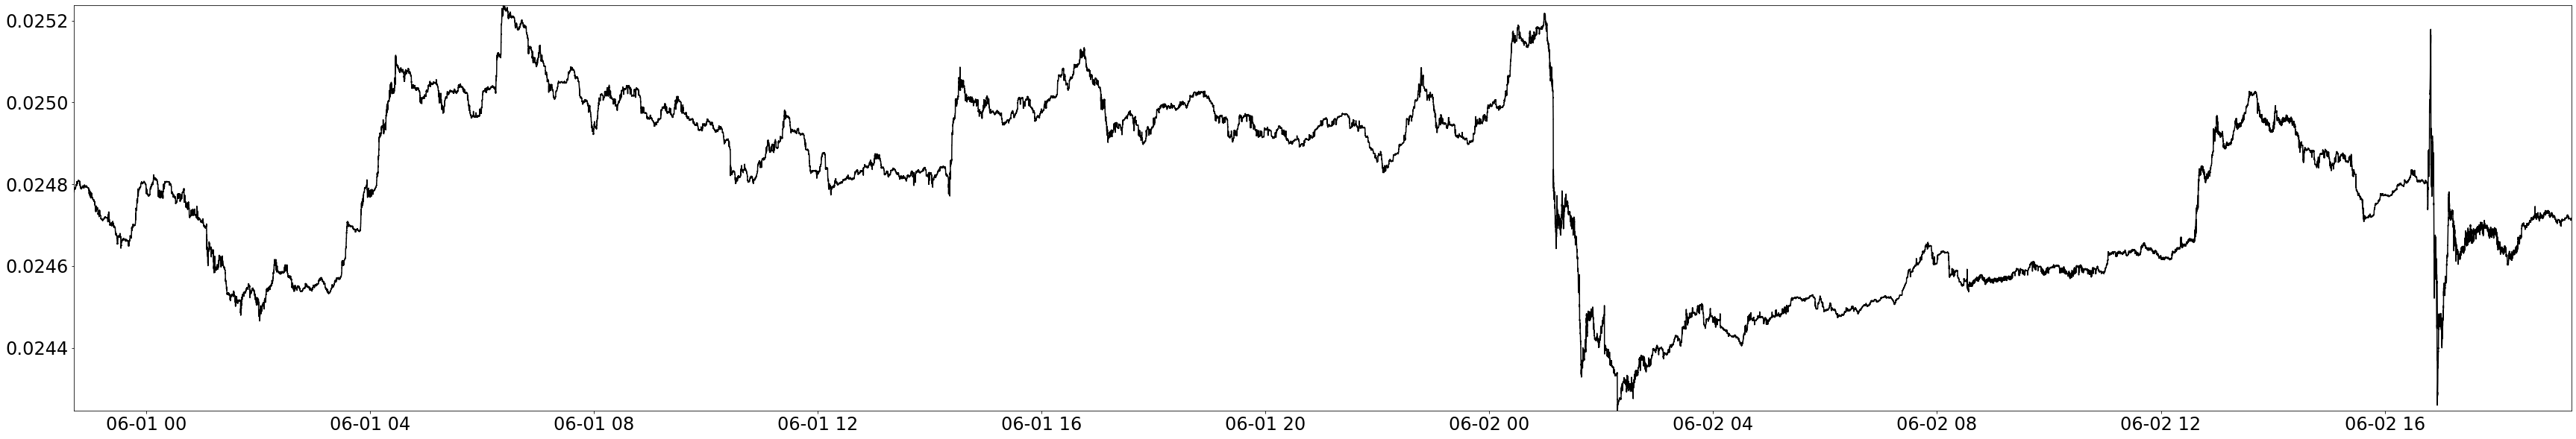

In [47]:
plt.rcParams["figure.figsize"] = (60,10)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.margins(0,0)
plt.plot(data["AvgPrice"], color = "black")
plt.savefig("AvgPrice")

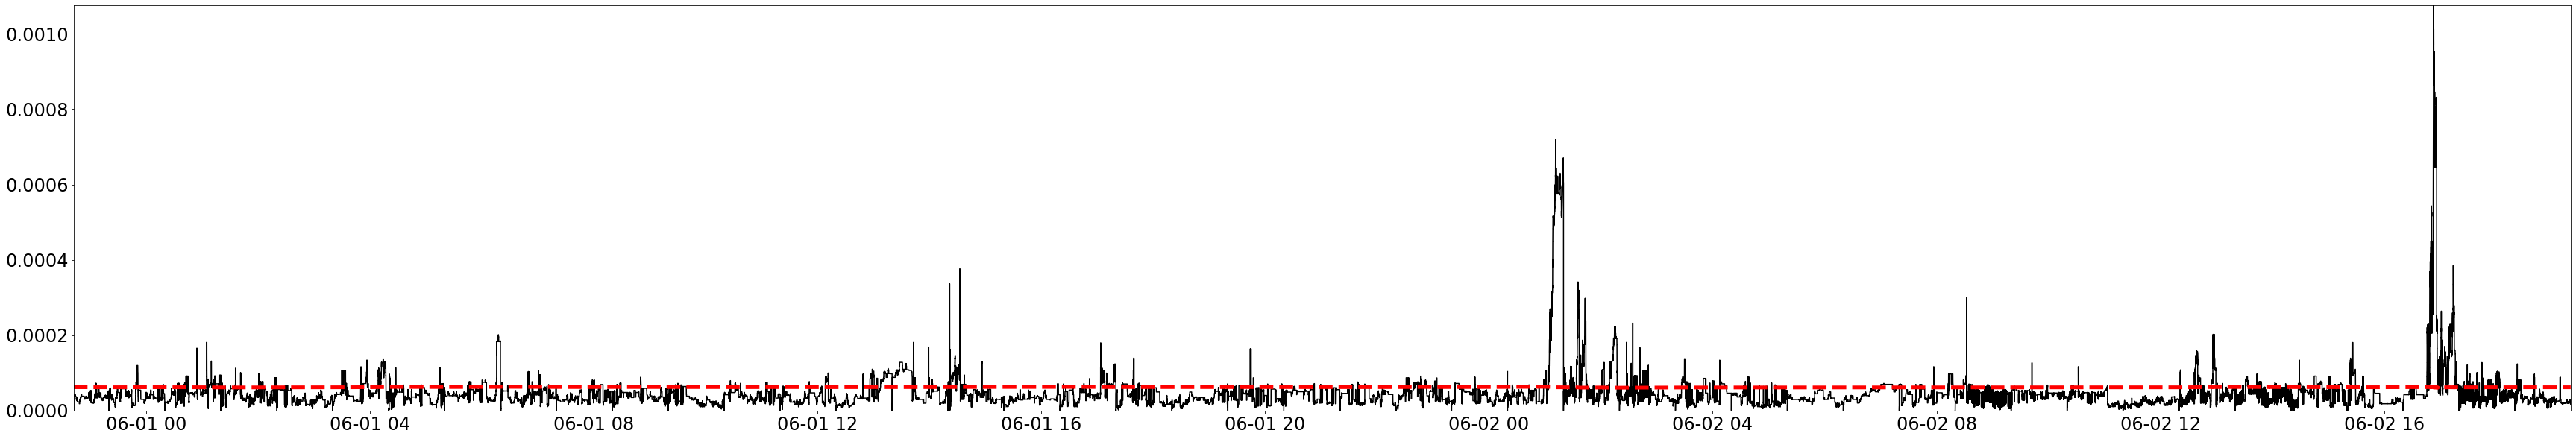

In [49]:
plt.rcParams["figure.figsize"] = (60,10)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.margins(0,0)
plt.plot(data["Maximum"], color = "black")
plt.plot(data[["Average"]],color='red', linestyle = "dashed", linewidth=5, marker='', label='Maximum price difference')
plt.savefig("Maximum")

C:\Users\Daniel\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


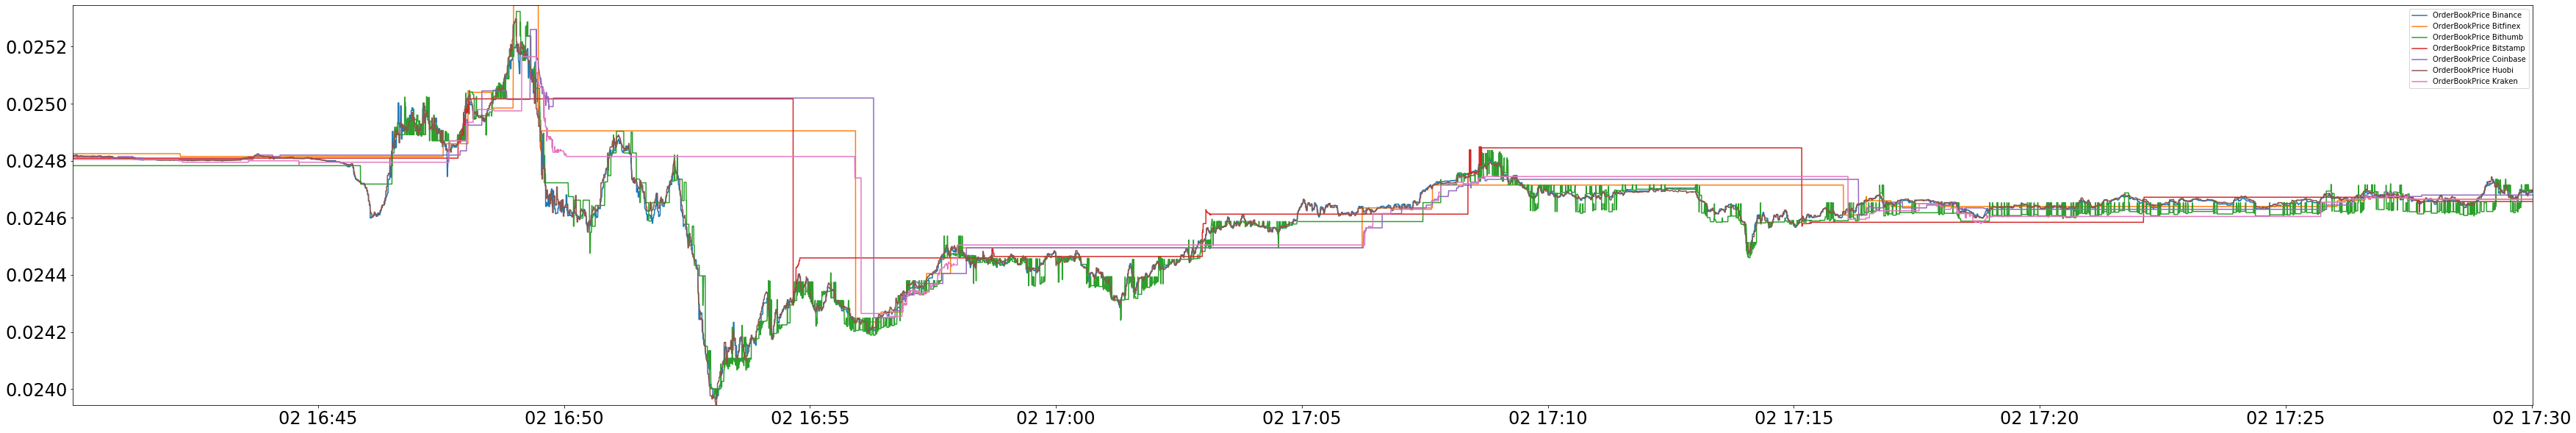

In [20]:
plt.rcParams["figure.figsize"] = (60,10)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.margins(0,0)
cols = [col for col in data if (col.startswith('Order'))]
plt.plot(data[cols].loc["2020-06-02 16:40:00":"2020-06-02 17:30:00"])
plt.legend(cols)

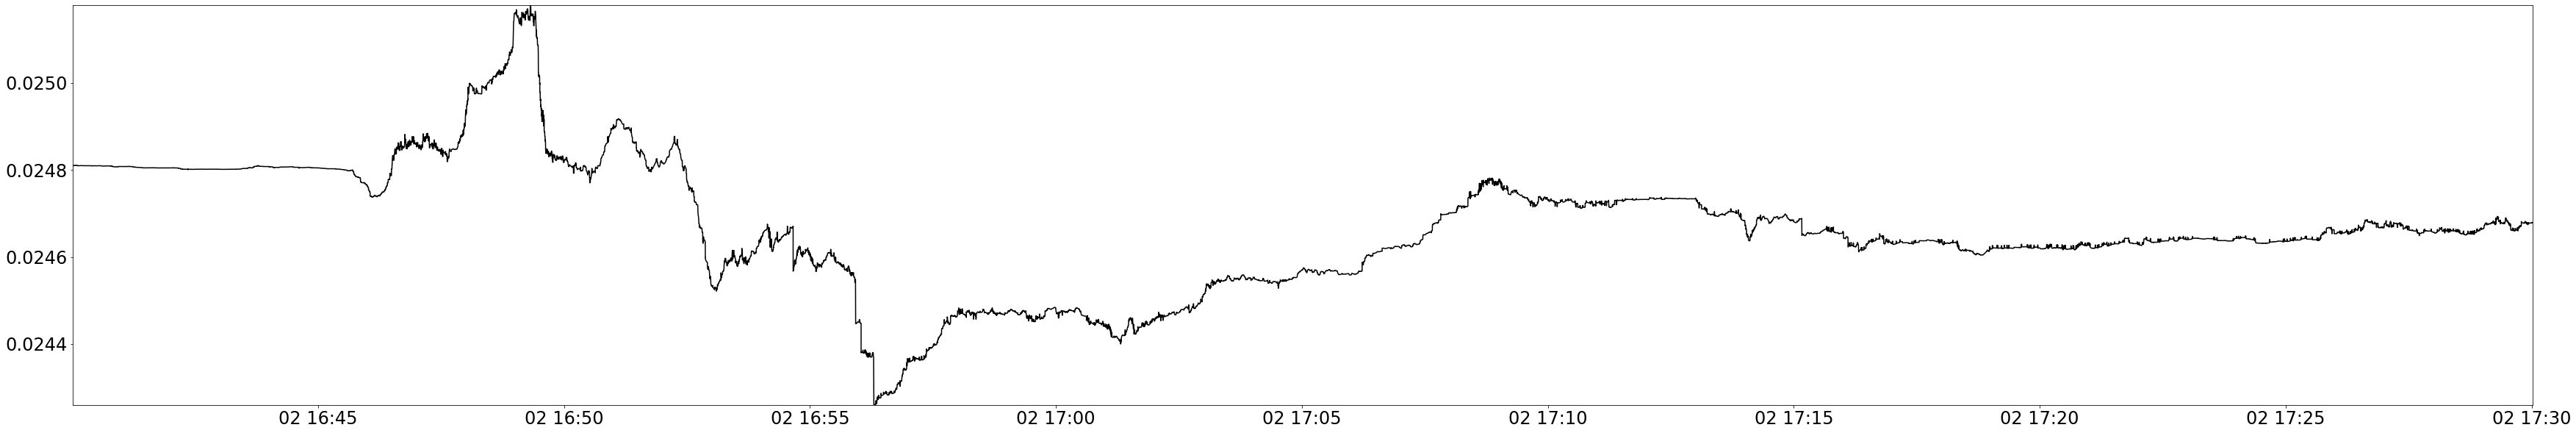

In [97]:
plt.rcParams["figure.figsize"] = (60,10)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.margins(0,0)
plt.plot(data["AvgPrice"].loc["2020-06-02 16:40:00":"2020-06-02 17:30:00"], color = "black")

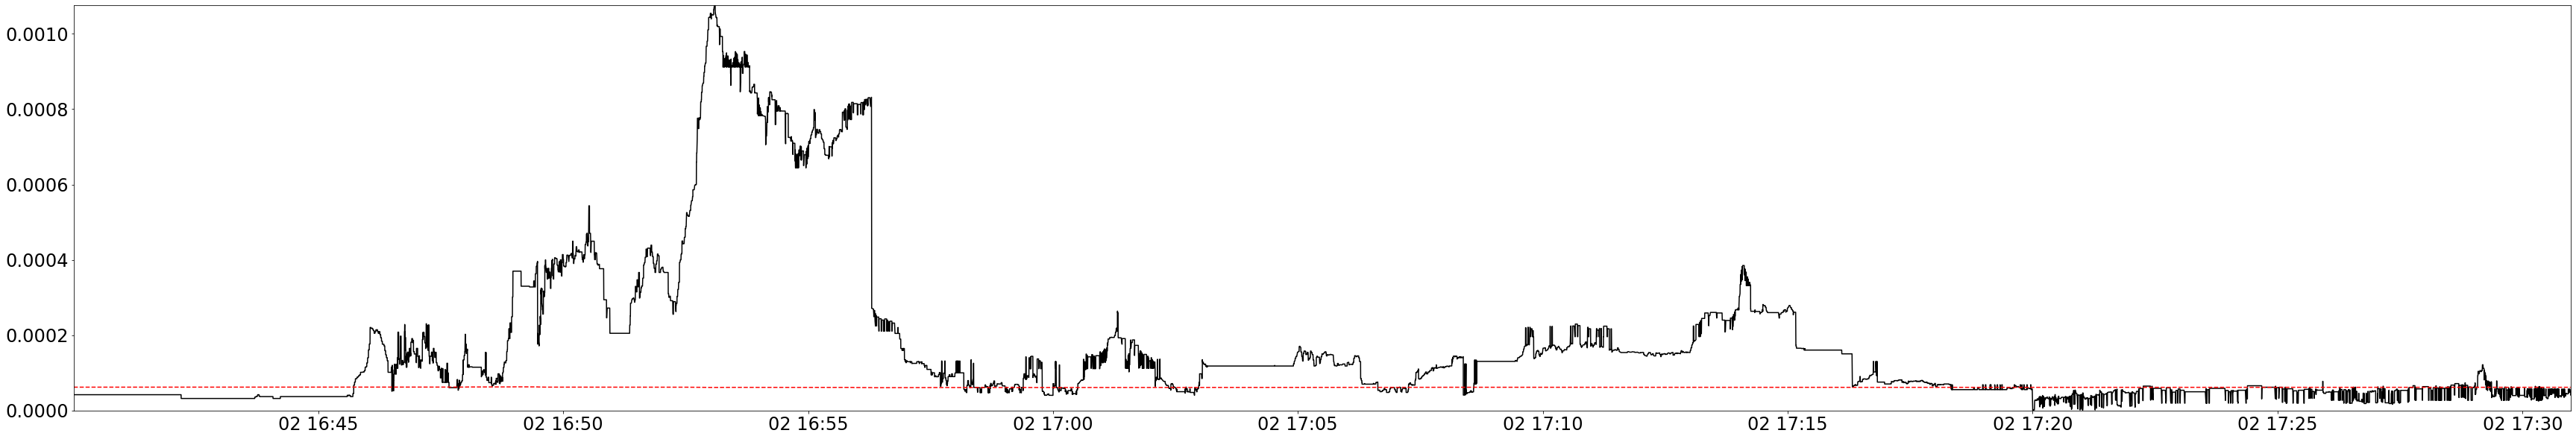

In [794]:
plt.rcParams["figure.figsize"] = (60,10)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.margins(0,0)
plt.plot(data["Maximum"].loc["2020-06-02 16:40:00":"2020-06-02 17:30:58"], color = "black")
plt.plot(data[["Average"]].loc["2020-06-02 16:40:00":"2020-06-02 17:30:58"],color='red', linestyle = "dashed", linewidth=1.5, marker='', label='Maximum price difference')

In [56]:
data.loc["2020-06-02 16:45:00":"2020-06-02 17:15:00"].iloc[0:500]

,Average,Batch_ID,Label,MaxExch,Maximum,MinExch,OrderBookPrice Binance,OrderBookPrice Bitfinex,OrderBookPrice Bithumb,OrderBookPrice Bitstamp,OrderBookPrice Coinbase,OrderBookPrice Huobi,OrderBookPrice Kraken,AvgPrice
2020-06-02 16:45:00.376000+00:00,0.000062,12782,0,Bithumb,0.000037,Coinbase,0.024805,0.024815,0.024783,0.024809,0.02482,0.024806,0.024795,0.024805
2020-06-02 16:45:00.452000+00:00,0.000062,12783,0,Bithumb,0.000037,Coinbase,0.024805,0.024815,0.024783,0.024809,0.02482,0.024806,0.024795,0.024805
2020-06-02 16:45:00.611000064+00:00,0.000062,12784,0,Bithumb,0.000037,Coinbase,0.024805,0.024815,0.024783,0.024809,0.02482,0.024806,0.024795,0.024805
2020-06-02 16:45:00.612000+00:00,0.000062,12785,0,Bithumb,0.000037,Coinbase,0.024805,0.024815,0.024783,0.024809,0.02482,0.024806,0.024795,0.024805
2020-06-02 16:45:01.015000064+00:00,0.000062,12786,0,Bithumb,0.000037,Coinbase,0.024805,0.024815,0.024783,0.024809,0.02482,0.024806,0.024795,0.024805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-02 16:45:48.984999936+00:00,0.000062,13277,0,Coinbase,0.000089,Huobi,0.024733,0.024815,0.024783,0.024809,0.02482,0.024730,0.024795,0.024784
2020-06-02 16:45:49.048000+00:00,0.000062,13278,0,Coinbase,0.000089,Huobi,0.024733,0.024815,0.024783,0.024809,0.02482,0.024730,0.024795,0.024784
2020-06-02 16:45:49.403000064+00:00,0.000062,13279,0,Coinbase,0.000091,Huobi,0.024733,0.024815,0.024783,0.024809,0.02482,0.024729,0.024795,0.024783
2020-06-02 16:45:49.436000+00:00,0.000062,13280,0,Coinbase,0.000091,Huobi,0.024733,0.024815,0.024783,0.024809,0.02482,0.024729,0.024795,0.024783


C:\Users\Daniel\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


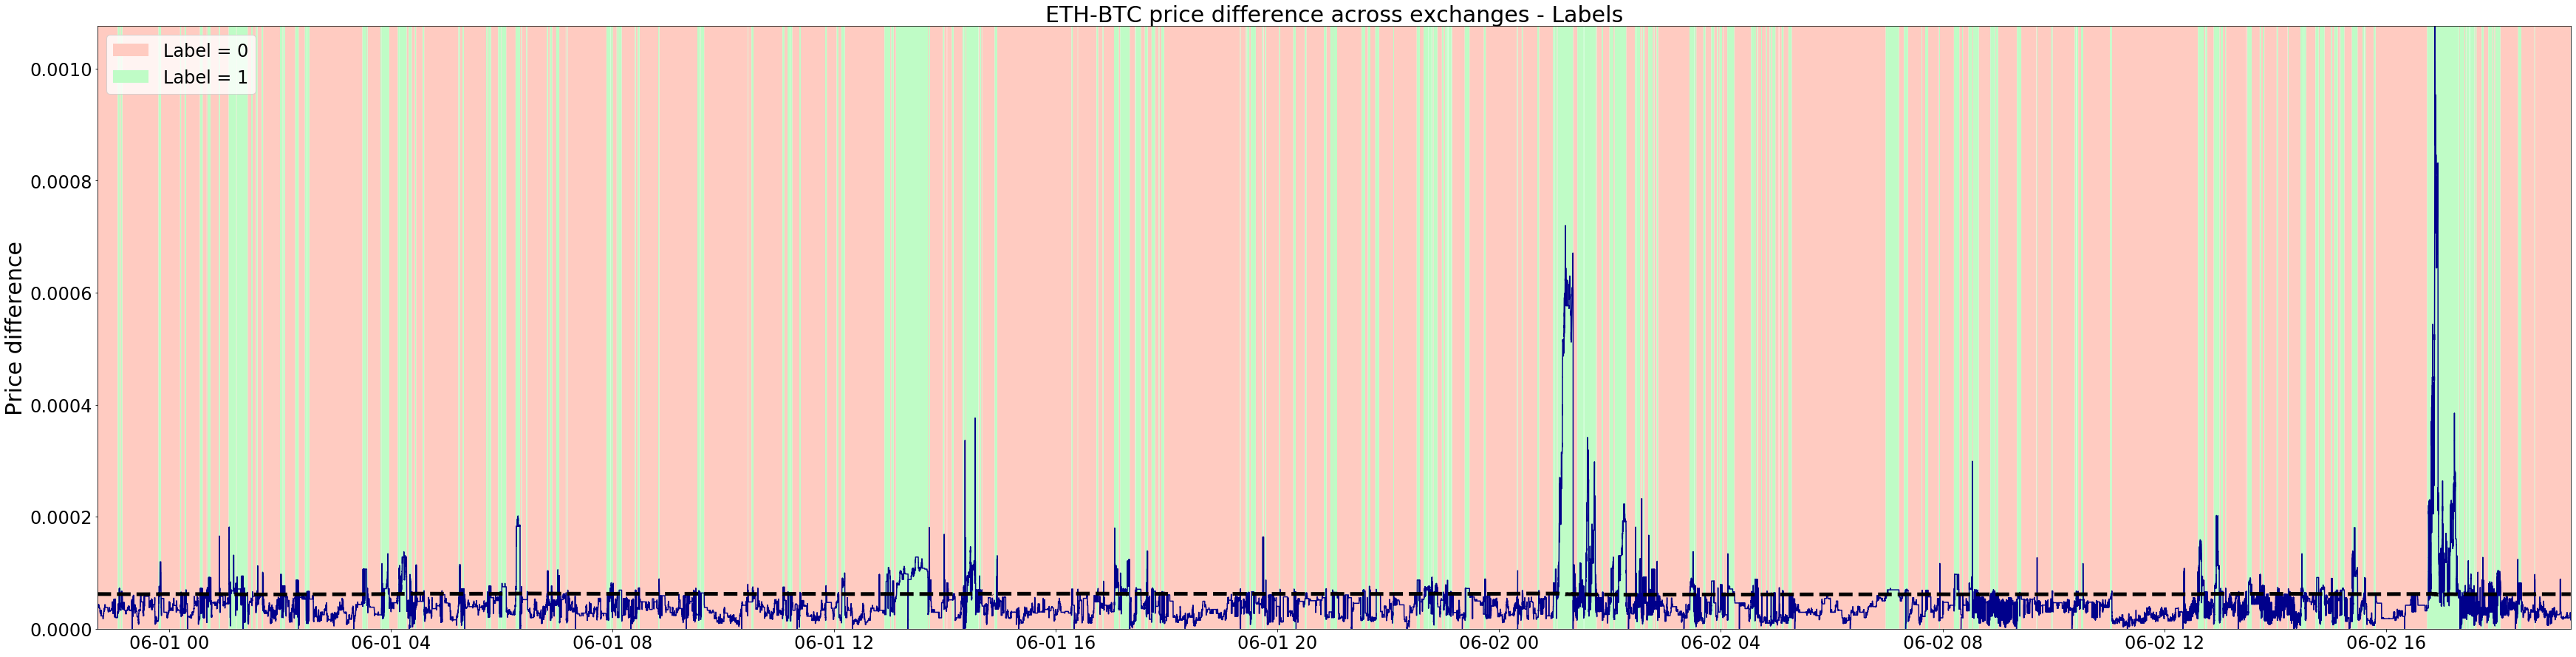

In [48]:
test = data
ma = test[["Maximum"]]
colors = [[(255/255,203/255,193/255)],
          [(191/255,252/255,198/255)]]
state = test[["Label2"]]
plt.rcParams["figure.figsize"] = (60,15)
params = {'legend.fontsize': 24,
          'legend.handlelength': 2}
plt.rcParams.update(params)
# plt.subplots_adjust(0,0,1,1)

fig, axs = plt.subplots(1)
plt.sca(axs)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.margins(0,0)
# fig.tight_layout()
cmap = plt.get_cmap('RdYlGn_r')
fields = ["Label2"]
names = ["Maximum", "Minimum"]

axs.plot(ma,color="darkblue", linewidth=1.5, marker='',
        label='Maximum price difference')

axs.set_xlabel('',fontsize = 30.0)
axs.set_ylabel('Price difference',fontsize = 30.0)
axs.set_title('ETH-BTC price difference across exchanges - Labels',fontsize = 30.0)
axs.grid(False)
axs.legend(loc='upper center')
axs.set_xlim(xmin=ma.index[0], xmax=ma.index[-1])

trans = mtransforms.blended_transform_factory(axs.transData, axs.transAxes)
c = []
for j in range(2):
    c.append(axs.fill_between(ma.index, np.min(ma), np.max(ma), 
                                 where=state[fields[0]]==j,label = "Label = " + str(j),facecolor=colors[j]))

axs.legend([k for k in c], [c[k].get_label() for k in range(len(c))])
axs.plot(test[["Average"]],color='black', linestyle = "dashed", linewidth=5, marker='', label='Maximum price difference')



In [94]:
ma = data[["Maximum"]]
state = data[["MaxExch", "MinExch"]]
colors = [[(254/255,255/255,191/255)],
          [(252/255,220/255,223/255)],
          [(176/255,239/255,239/255)],
          [(244/255,152/255,194/255)],
          [(201/255,151/255,198/255)],
          [(131/255,217/255,220/255)],
          [(181/255,185/255,255/255)]]
exchanges = ["Binance", "Bitfinex", "Bithumb", "Bitstamp", "Coinbase", "Huobi", "Kraken"]

C:\Users\Daniel\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


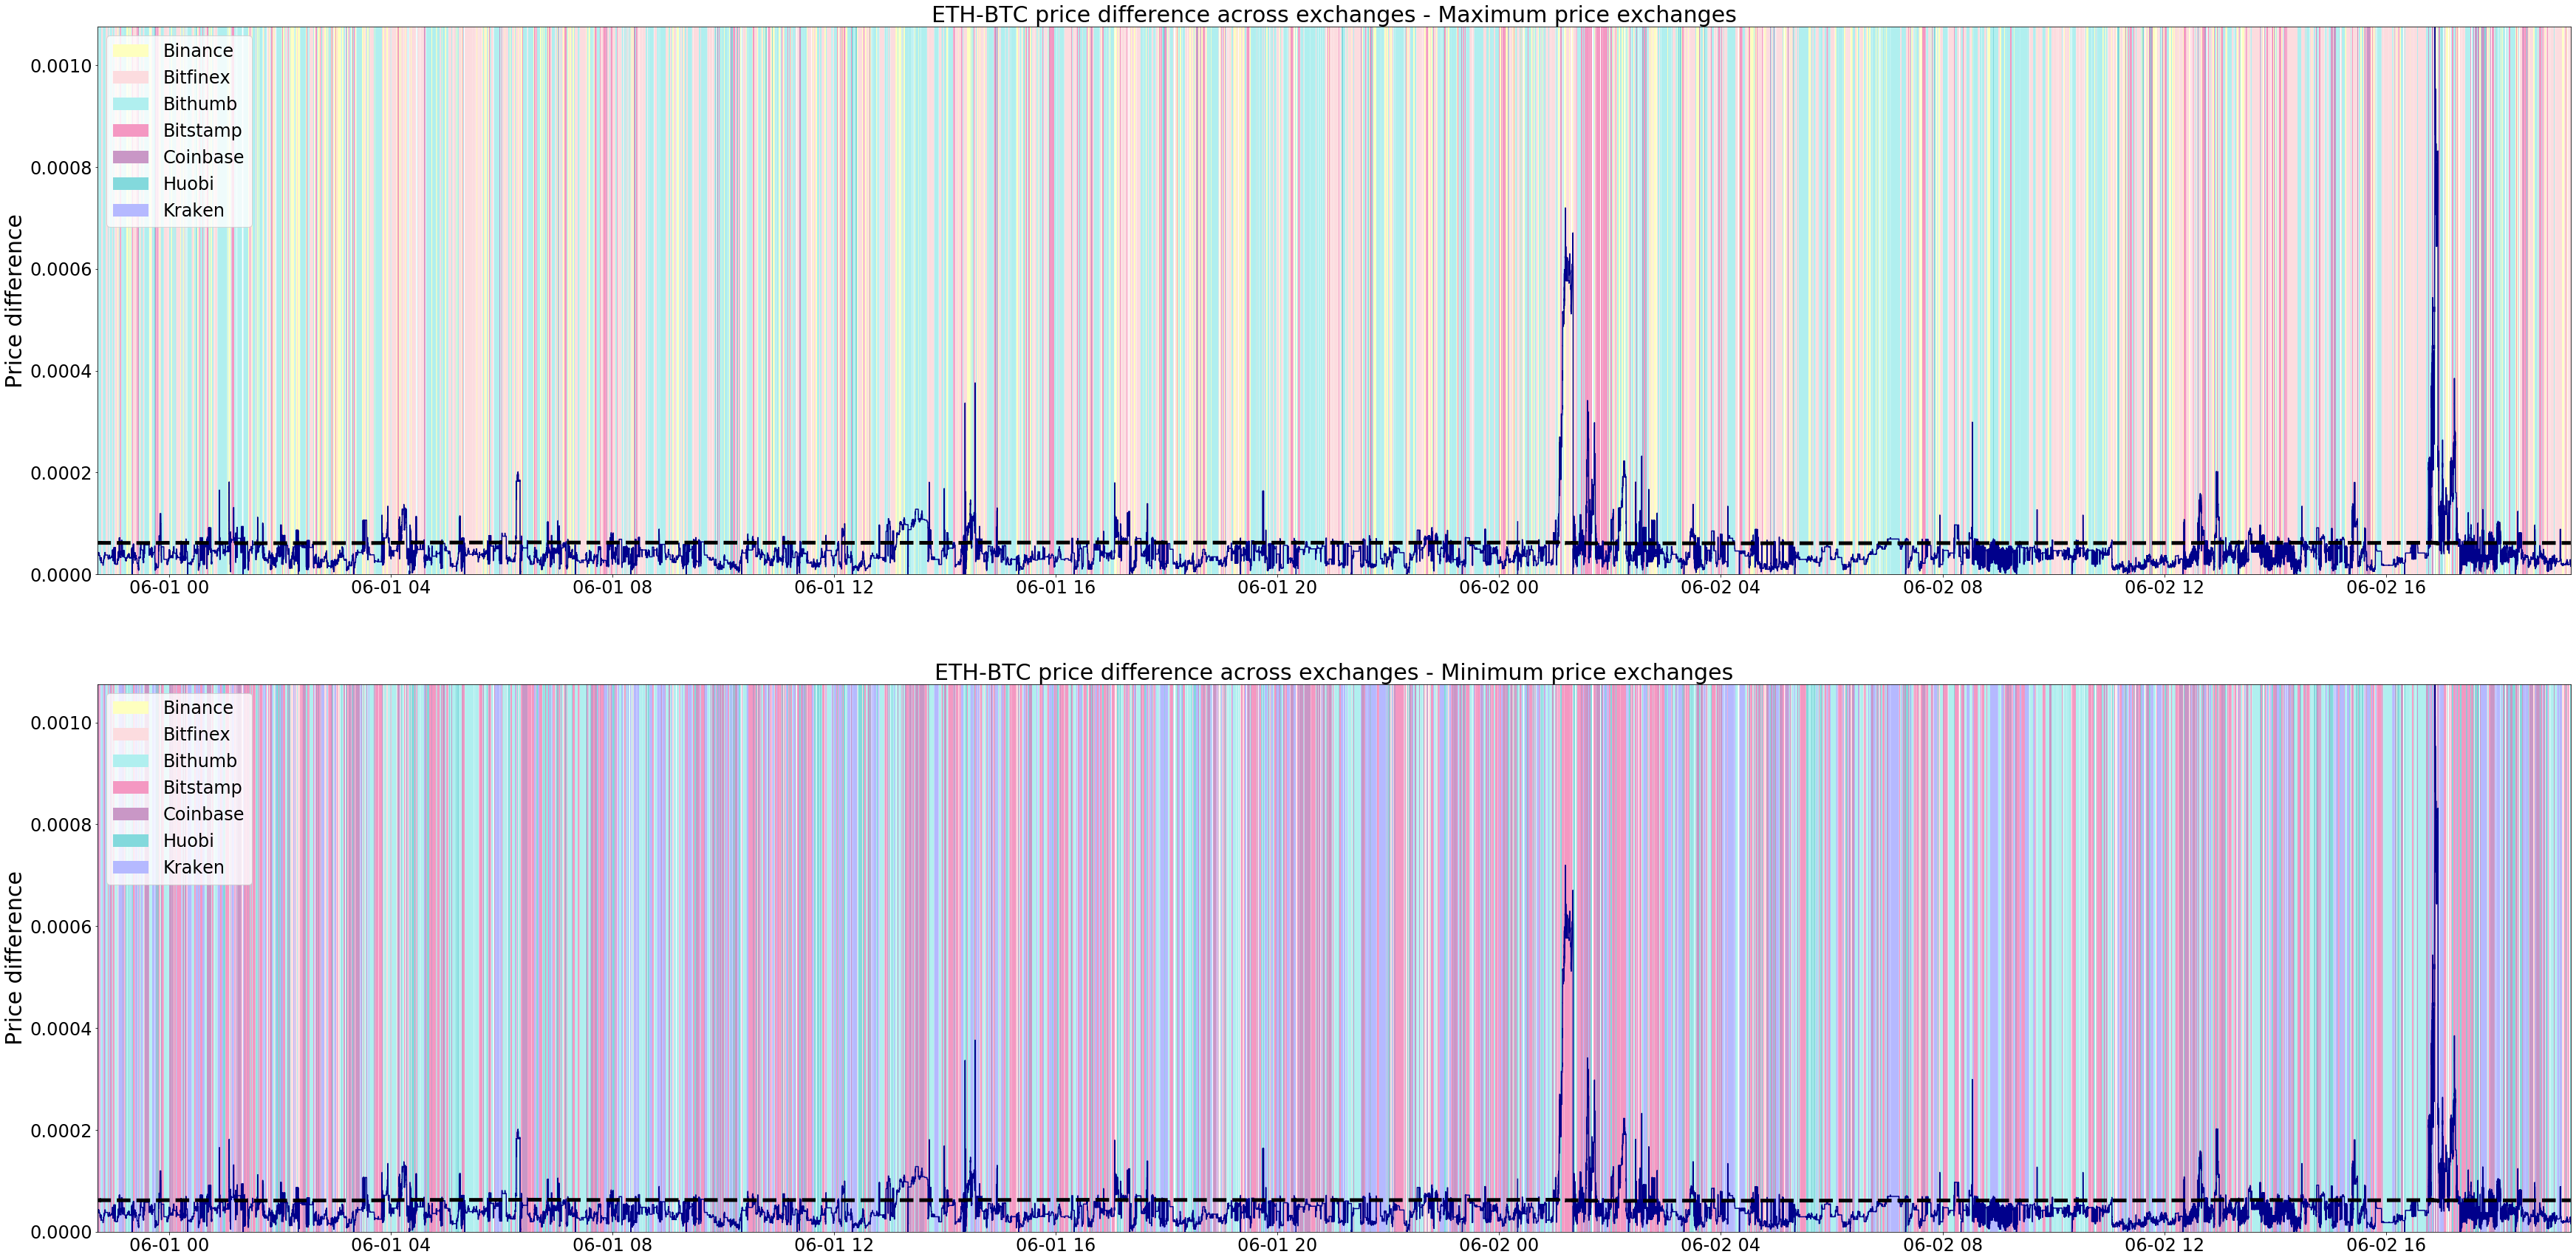

In [95]:
plt.rcParams["figure.figsize"] = (60,30)
params = {'legend.fontsize': 24,
          'legend.handlelength': 2}
fig, axs = plt.subplots(2)



cmap = plt.get_cmap('RdYlGn_r')
fields = ["MaxExch", "MinExch"]
names = ["Maximum", "Minimum"]

for i in range(2):
    plt.sca(axs[i])
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    plt.margins(0,0)
    axs[i].plot(ma,color="darkblue", linewidth=1.5, marker='',
            label='Maximum price difference')

    axs[i].set_xlabel('')
    axs[i].set_ylabel('Price difference',fontsize = 30.0)
    axs[i].set_title('ETH-BTC price difference across exchanges - ' + names[i]  + ' price exchanges',fontsize = 30.0)
    axs[i].grid(False)
    axs[i].legend(loc='upper center')
    axs[i].set_xlim(xmin=ma.index[0], xmax=ma.index[-1])

    trans = mtransforms.blended_transform_factory(axs[i].transData, axs[i].transAxes)
    c = []
    for j in range(len(exchanges)):
        c.append(axs[i].fill_between(ma.index, np.min(ma), np.max(ma), 
                                     where=state[fields[i]]==exchanges[j],label = exchanges[j],facecolor=colors[j]))
    
    axs[i].legend([k for k in c], [c[k].get_label() for k in range(len(c))])
    axs[i].plot(data[["Average"]],color='black', linestyle = "dashed", linewidth=5, marker='', label='Maximum price difference')

In [795]:
ma = data[["Maximum"]].loc["2020-06-02 16:40:00":"2020-06-02 17:30:58"]
state = data[["MaxExch", "MinExch"]].loc["2020-06-02 16:40:00":"2020-06-02 17:30:58"]
colors = [[(254/255,255/255,191/255)],
          [(252/255,220/255,223/255)],
          [(176/255,239/255,239/255)],
          [(244/255,152/255,194/255)],
          [(201/255,151/255,198/255)],
          [(131/255,217/255,220/255)],
          [(181/255,185/255,255/255)]]
exchanges = ["Binance", "Bitfinex", "Bithumb", "Bitstamp", "Coinbase", "Huobi", "Kraken"]

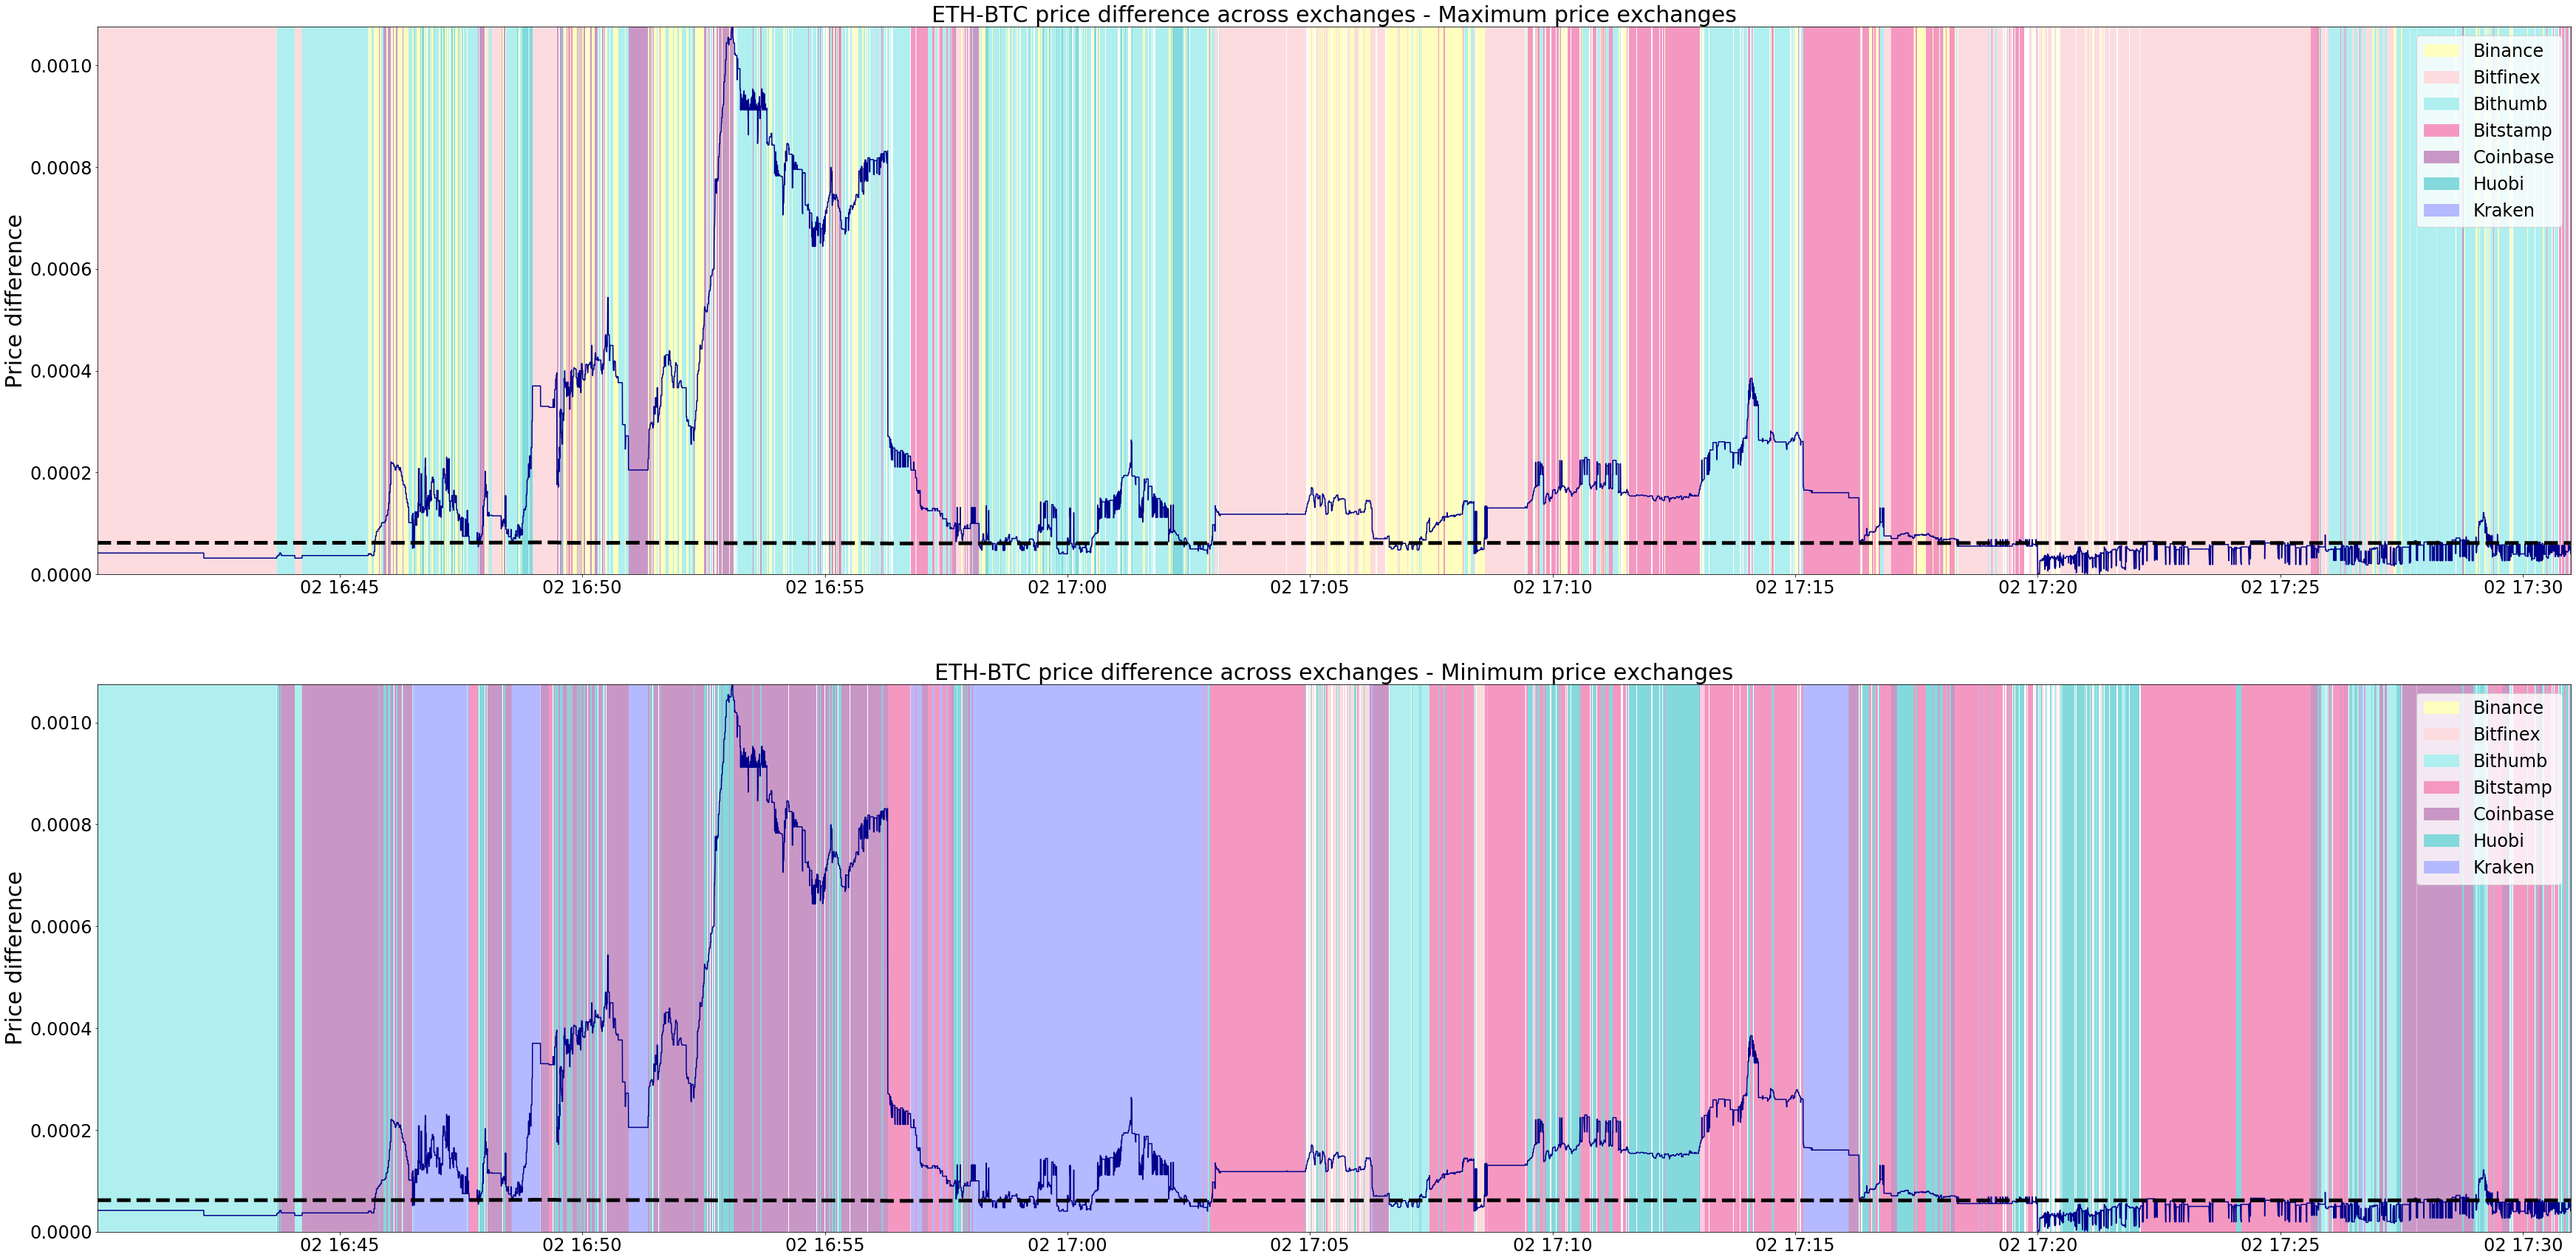

In [796]:
plt.rcParams["figure.figsize"] = (60,30)
params = {'legend.fontsize': 24,
          'legend.handlelength': 2}
fig, axs = plt.subplots(2)



cmap = plt.get_cmap('RdYlGn_r')
fields = ["MaxExch", "MinExch"]
names = ["Maximum", "Minimum"]

for i in range(2):
    plt.sca(axs[i])
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    plt.margins(0,0)
    axs[i].plot(ma,color="darkblue", linewidth=1.5, marker='',
            label='Maximum price difference')

    axs[i].set_xlabel('')
    axs[i].set_ylabel('Price difference',fontsize = 30.0)
    axs[i].set_title('ETH-BTC price difference across exchanges - ' + names[i]  + ' price exchanges',fontsize = 30.0)
    axs[i].grid(False)
    axs[i].legend(loc='upper center')
    axs[i].set_xlim(xmin=ma.index[0], xmax=ma.index[-1])

    trans = mtransforms.blended_transform_factory(axs[i].transData, axs[i].transAxes)
    c = []
    for j in range(len(exchanges)):
        c.append(axs[i].fill_between(ma.index, np.min(ma), np.max(ma), 
                                     where=state[fields[i]]==exchanges[j],label = exchanges[j],facecolor=colors[j]))
    
    axs[i].legend([k for k in c], [c[k].get_label() for k in range(len(c))])
    axs[i].plot(data[["Average"]].loc["2020-06-02 16:40:00":"2020-06-02 17:30:58"],color='black', linestyle = "dashed", linewidth=5, marker='', label='Maximum price difference')

Check times. For future analysis, we have to take the differences into account. Still I dont have figure it out how to make sure that the times reported by the different exchanges are equivalent to each other (i.e that 14:00 in Binance means 14:00 in Huobi for example)

# 5.- Results

## 5.1 DeepLOB

In [11]:
cvgg_acc = [0.513,0.5535,0.5813,0.612]
cvgg_pre = [0.5226,0.6912,0.7402,0.7963]
cvgg_rec = [0.2998,0.1934,0.2507,0.301]
cvgg_f1 = list((np.asarray(cvgg_pre)*np.asarray(cvgg_rec)*2)/(np.asarray(cvgg_pre)+np.asarray(cvgg_rec)))
        
fvgg_acc = [0.5496,0.7551,0.5907,0.6175]
fvgg_pre = [0.5946,0.7102,0.6681,0.6556]
fvgg_rec = [0.312,0.8621,0.3603,0.495]
fvgg_f1 = list((np.asarray(fvgg_pre)*np.asarray(fvgg_rec)*2)/(np.asarray(fvgg_pre)+np.asarray(fvgg_rec)))



In [13]:
np.mean(fvgg_f1)

0.5550741975305011

In [14]:
accuracy = [0.4852,0.5008,0.4706,0.5682,0.6165,0.6304,0.5208,
           0.6236,0.5602,0.69,0.5487,0.6345,0.498,
           0.648,0.7146,0.6363,0.5923,0.6107,0.6052,
           0.5049,0.5831,0.6846,0.6402,0.4746,0.6055,0.6157,
           0.4981,0.5648,0.569,0.4623,0.5936,0.5095,
           0.5829,0.536,0.6233,0.7239,0.7517,0.6054,
           0.6963,0.6136,0.9609,0.676,0.8319]
precision = [0.4122,0.5004,0.448,0.6485,0.6875,0.9532,0.6734,
            0.6786,0.7586,0.6326,0.6692,0.6906,0.4932,
            0.5976,0.7031,0.8078,0.6392,0.6029,0.7988,
            0.5034,0.5827,0.6813,0.7688,0.4122,0.7529,0.6232,
            0.4923,0.5704,0.7117,0.1006,0.8957,0.5006,
            0.6668,0.6062,0.7194,0.8305,0.8575,0.6551,
            0.8404,0.6625,0.9733,0.6492,0.8406]
recall = [0.1982,0.3856,0.2537,0.2979,0.4273,0.2743,0.08062,
         0.4697,0.1766,0.3399,0.1928,0.4873,0.1473,
         0.9065,0.5872,0.3578,0.4239,0.6486,0.2813,
         0.7195,0.5856,0.8571,0.401,0.35,0.3139,0.5852,
         0.12,0.525,0.2319,0.009,0.2119,0.7959,
         0.3314,0.2053,0.6233,0.5627,0.6037,0.4452,
         0.4848,0.4632,0.9478,0.7655,0.819]

f1 = list((np.asarray(precision)*np.asarray(recall)*2)/(np.asarray(precision)+np.asarray(recall)))

In [15]:
np.mean(accuracy)

0.6061023255813953

In [16]:
np.mean(precision)

0.6579697674418604

In [17]:
np.mean(recall)

0.4394051162790697

In [18]:
np.mean(f1)

0.4942310251690986

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text yticklabel objects>)

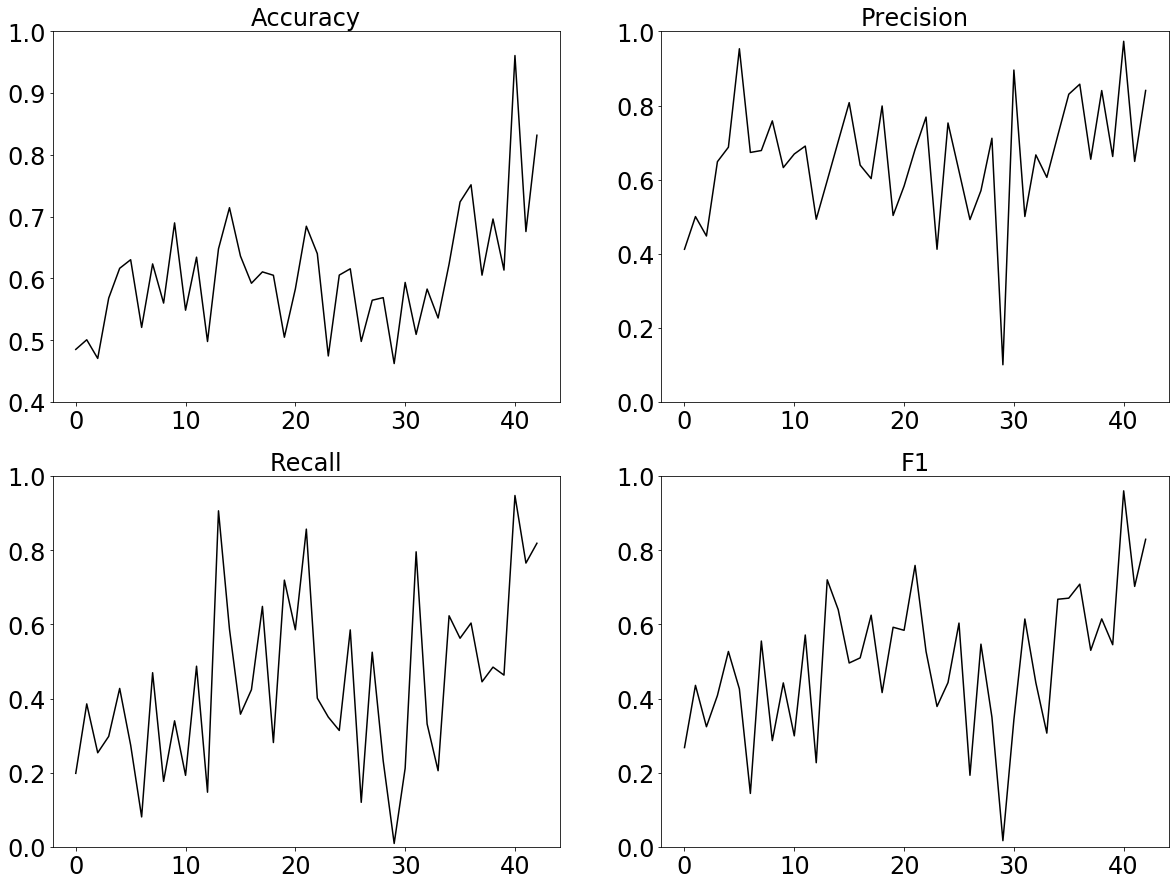

In [20]:
plt.rcParams["figure.figsize"] = (20,15)
fig, axs = plt.subplots(2,2)


axs[0,0].plot(accuracy, color = "black")
axs[0,0].set_ylim([0.4,1])
axs[0,0].set_title('Accuracy', fontsize = 24)
plt.sca(axs[0, 0])
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)


axs[0,1].plot(precision, color = "black")
axs[0,1].set_title('Precision', fontsize = 24)
axs[0,1].set_ylim([0,1])
plt.sca(axs[0, 1])
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)


axs[1,0].plot(recall, color = "black")
axs[1,0].set_title('Recall', fontsize = 24)
axs[1,0].set_ylim([0,1])
plt.sca(axs[1, 0])
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

axs[1,1].plot(f1, color = "black")
axs[1,1].set_title('F1', fontsize = 24)
axs[1,1].set_ylim([0,1])
plt.sca(axs[1, 1])
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)